In [1]:
import pandas as pd
import os
os.chdir("../../")
import utils.reshaping_functions as shape
os.chdir("./data_collection/votes")
import re

In [6]:
mothership = pd.read_pickle("votes_scraped_over_night_v2.pkl")
mothership.head(1)

,vote_id,description,votes,votes_by_party,vote_caller,url
0,"Afstemning nr. 152, 2021-22","[Sagsgang:, Fremsat 05-10-2021, 1. behandlet /...","{'politician': ['Abbas Razvi', 'Aki-Matilda Hø...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Finansminister, Nicolai Wammen (S)]",https://www.ft.dk//samling/20211/afstemning/15...


### Preprocessing Steps

In [3]:
mothership['description_text'] = mothership['description'].apply(lambda x: shape.find_resume(x))
mothership['date'] = mothership['description'].apply(lambda x: shape.find_date(x))
mothership['description'] = mothership['description'].apply(lambda x: None if x == "no description" else x)

In [4]:
# klima vote / flytrafik
#mothership['description_text'][37]

In [5]:
#241 with missing description
mothership[mothership.isna().any(axis=1)].head(2)


,vote_id,description,votes,votes_by_party,vote_caller,url,description_text,date
12,"Afstemning nr. 245, 2021-22",None,"{'politician': ['Abbas Razvi', 'Aki-Matilda Hø...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Finansminister, Nicolai Wammen (S)]",https://www.ft.dk//samling/20211/afstemning/24...,NaN,NaN
59,"Afstemning nr. 263, 2021-22",None,"{'politician': ['Abbas Razvi', 'Aki-Matilda Hø...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Udlændinge- og integrationsminister, Mattias ...",https://www.ft.dk//samling/20211/afstemning/26...,NaN,NaN


In [6]:
mothership_clean = mothership.dropna()
mothership_clean.sort_values('date', inplace=True)
mothership_clean.reset_index(inplace=True, drop=True)

C:\Users\COBOD\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [7]:
mothership_clean.to_pickle("votes_data_cleaned.pkl")
mothership_clean["year"] = mothership_clean["date"].astype(str).str[:4]
mothership_clean.head(1)

C:\Users\COBOD\AppData\Local\Temp/ipykernel_12052/77518930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mothership_clean["year"] = mothership_clean["date"].astype(str).str[:4]


,vote_id,description,votes,votes_by_party,vote_caller,url,description_text,date,year
0,"Afstemning nr. 2, 2004-05 (1. samling)","[Fremsat:, 07-10-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Frank Jensen (S), Holger K. Nielsen (SF), Lin...",https://www.ft.dk//samling/20041/afstemning/2.htm,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,2004


<AxesSubplot:xlabel='year'>

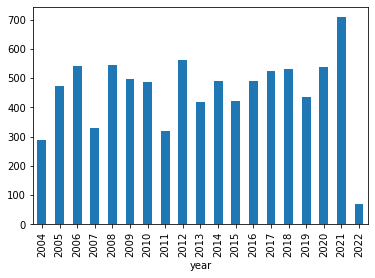

In [8]:
mothership_clean.groupby(["year"])["vote_id"].nunique().plot.bar()

In [9]:
view_mothership = mothership_clean
klimaforandringer = re.compile(r"(K|k)lima(forandringer)?(ne)?")
co2 = re.compile(r"(CO 2)|(CO2)|(kulstof(udledning(en)?)?)|(co2)")
grøn_omstilling = re.compile(r"grøn(ne)? omstilling")


In [10]:
view_mothership['klimaforandringer'] = view_mothership['description_text'].apply(lambda x: 1 if re.search(klimaforandringer, x)!=None else 0)
view_mothership['CO2'] = view_mothership['description_text'].apply(lambda x: 1 if re.search(co2, x)!=None else 0)
view_mothership['grøn_omstilling'] = view_mothership['description_text'].apply(lambda x: 1 if re.search(grøn_omstilling, x)!=None else 0)


C:\Users\COBOD\AppData\Local\Temp/ipykernel_9532/1493337026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view_mothership['klimaforandringer'] = view_mothership['description_text'].apply(lambda x: 1 if re.search(klimaforandringer, x)!=None else 0)
C:\Users\COBOD\AppData\Local\Temp/ipykernel_9532/1493337026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view_mothership['CO2'] = view_mothership['description_text'].apply(lambda x: 1 if re.search(co2, x)!=None else 0)
C:\Users\COBOD\AppData\Local\Tem

In [11]:
view_mothership[(view_mothership.CO2 == 1) | (view_mothership.klimaforandringer==1) | (view_mothership.grøn_omstilling==1)]

,vote_id,description,votes,votes_by_party,vote_caller,url,description_text,date,year,klimaforandringer,CO2,grøn_omstilling
78,"Afstemning nr. 270, 2004-05 (1. samling)","[Sagsgang:, Fremsat 17-11-2004, 1. behandlet /...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Skatteminister, Kristian Jensen (V)]",https://www.ft.dk//samling/20041/afstemning/27...,Loven indeholder følgende elementer: - CO2-afg...,2004-12-20,2004,0,1,0
95,"Afstemning nr. 264, 2004-05 (1. samling)","[Sagsgang:, Fremsat 07-10-2004, 1. behandlet /...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Skatteminister, Kristian Jensen (V)]",https://www.ft.dk//samling/20041/afstemning/26...,Loven indfører regler om den skattemæssige beh...,2004-12-20,2004,0,1,0
324,"Afstemning nr. 100, 2004-05 (2. samling)","[Fremsat:, 17-05-2005, Forslag til vedtagelse:...","{'politician': ['Allan Niebuhr', 'Anders Fogh ...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Steen Gade (SF), Lars Christian Lilleholt (V)...",https://www.ft.dk//samling/20042/afstemning/10...,Folketinget ser det som vigtigt at koble løsni...,2005-05-17,2005,1,0,0
398,"Afstemning nr. 115, 2004-05 (2. samling)","[Sagsgang:, Fremsat 02-03-2005, 1. behandlet /...","{'politician': ['Allan Niebuhr', 'Anders Fogh ...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Transport- og energiminister, Flemming Hansen...",https://www.ft.dk//samling/20042/afstemning/11...,"Loven ændrer lov om CO2-kvoter, således at en ...",2005-06-01,2005,0,1,0
415,"Afstemning nr. 124, 2004-05 (2. samling)","[Sagsgang:, Fremsat 02-03-2005, 1. behandlet /...","{'politician': ['Allan Niebuhr', 'Anders Fogh ...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Transport- og energiminister, Flemming Hansen...",https://www.ft.dk//samling/20042/afstemning/12...,"Loven ændrer lov om CO2-kvoter, således at en ...",2005-06-01,2005,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8588,"Afstemning nr. 137, 2021-22","[Sagsgang:, Fremsat 10-11-2021, 1. behandlet /...","{'politician': ['Abbas Razvi', 'Aki-Matilda Hø...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Klima-, energi- og forsyningsminister, Dan Jø...",https://www.ft.dk//samling/20211/afstemning/13...,Formålet med lovforslaget er at fremme udnytte...,2021-12-28,2021,1,0,0
8646,"Afstemning nr. 316, 2021-22","[Fremsat:, 03-03-2022, Forslag til vedtagelse:...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...",[Henning Hyllested (EL)],https://www.ft.dk//samling/20211/afstemning/31...,Regeringen opfordres til at ændre den danske l...,2022-03-03,2022,1,0,1
8647,"Afstemning nr. 318, 2021-22","[Fremsat:, 03-03-2022, Forslag til vedtagelse:...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Carl Valentin (SF), Anders Kronborg (S), Kath...",https://www.ft.dk//samling/20211/afstemning/31...,Folketinget opfatter klimakrisen som en af tid...,2022-03-03,2022,1,0,0
8649,"Afstemning nr. 315, 2021-22","[Fremsat:, 03-03-2022, Forslag til vedtagelse:...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...",[Thomas Jensen (S)],https://www.ft.dk//samling/20211/afstemning/31...,"Folketinget konstaterer, at luftfarten har en ...",2022-03-03,2022,1,0,1


In [12]:
df = pd.read_pickle("votes_data_cleaned.pkl")
df

,vote_id,description,votes,votes_by_party,vote_caller,url,description_text,date
0,"Afstemning nr. 2, 2004-05 (1. samling)","[Fremsat:, 07-10-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Frank Jensen (S), Holger K. Nielsen (SF), Lin...",https://www.ft.dk//samling/20041/afstemning/2.htm,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07
1,"Afstemning nr. 4, 2004-05 (1. samling)","[Sagsgang:, Fremsat (i betænkning) 19-10-2004,...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...",[Udvalget for Forretningsordenen (UFO)],https://www.ft.dk//samling/20041/afstemning/4.htm,Med folketingsbeslutningen giver Folketinget s...,2004-10-19
2,"Afstemning nr. 5, 2004-05 (1. samling)","[Fremsat:, 22-10-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Troels Lund Poulsen (V), Louise Frevert (DF),...",https://www.ft.dk//samling/20041/afstemning/5.htm,"Folketinget ser med tilfredshed, at arbejdet f...",2004-10-22
3,"Afstemning nr. 6, 2004-05 (1. samling)","[Fremsat:, 22-10-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Troels Lund Poulsen (V), Louise Frevert (DF),...",https://www.ft.dk//samling/20041/afstemning/6.htm,Folketinget opfordrer regeringen til at sætte ...,2004-10-22
4,"Afstemning nr. 9, 2004-05 (1. samling)","[Fremsat:, 16-11-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Hans Andersen (V), Charlotte Dyremose (KF), P...",https://www.ft.dk//samling/20041/afstemning/9.htm,"Folketinget konstaterer med tilfredshed, at re...",2004-11-16
...,...,...,...,...,...,...,...,...
8663,"Afstemning nr. 312, 2021-22","[Sagsgang:, Fremsat 18-11-2021, 1. behandlet /...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Justitsminister, Nick Hækkerup (S)]",https://www.ft.dk//samling/20211/afstemning/31...,Lovforslaget har bl.a. til formål at bringe de...,2022-03-08
8664,"Afstemning nr. 300, 2021-22","[Sagsgang:, Fremsat 18-11-2021, 1. behandlet /...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Justitsminister, Nick Hækkerup (S)]",https://www.ft.dk//samling/20211/afstemning/30...,Lovforslaget har bl.a. til formål at bringe de...,2022-03-08
8665,"Afstemning nr. 302, 2021-22","[Sagsgang:, Fremsat 18-11-2021, 1. behandlet /...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Justitsminister, Nick Hækkerup (S)]",https://www.ft.dk//samling/20211/afstemning/30...,Lovforslaget har bl.a. til formål at bringe de...,2022-03-08
8666,"Afstemning nr. 319, 2021-22","[Sagsgang:, Fremsat 06-10-2021, 1. behandlet/h...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Jane Heitmann (V), Heidi Bank (V), Karen Elle...",https://www.ft.dk//samling/20211/afstemning/31...,"Beslutningsforslaget går ud på at sikre, at fl...",2022-03-15


In [13]:
df = df[df.description_text.duplicated() != True]


In [15]:
df.reset_index(drop=True, inplace=True)
df

,vote_id,description,votes,votes_by_party,vote_caller,url,description_text,date
0,"Afstemning nr. 2, 2004-05 (1. samling)","[Fremsat:, 07-10-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Frank Jensen (S), Holger K. Nielsen (SF), Lin...",https://www.ft.dk//samling/20041/afstemning/2.htm,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07
1,"Afstemning nr. 4, 2004-05 (1. samling)","[Sagsgang:, Fremsat (i betænkning) 19-10-2004,...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...",[Udvalget for Forretningsordenen (UFO)],https://www.ft.dk//samling/20041/afstemning/4.htm,Med folketingsbeslutningen giver Folketinget s...,2004-10-19
2,"Afstemning nr. 5, 2004-05 (1. samling)","[Fremsat:, 22-10-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Troels Lund Poulsen (V), Louise Frevert (DF),...",https://www.ft.dk//samling/20041/afstemning/5.htm,"Folketinget ser med tilfredshed, at arbejdet f...",2004-10-22
3,"Afstemning nr. 6, 2004-05 (1. samling)","[Fremsat:, 22-10-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Troels Lund Poulsen (V), Louise Frevert (DF),...",https://www.ft.dk//samling/20041/afstemning/6.htm,Folketinget opfordrer regeringen til at sætte ...,2004-10-22
4,"Afstemning nr. 9, 2004-05 (1. samling)","[Fremsat:, 16-11-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Hans Andersen (V), Charlotte Dyremose (KF), P...",https://www.ft.dk//samling/20041/afstemning/9.htm,"Folketinget konstaterer med tilfredshed, at re...",2004-11-16
...,...,...,...,...,...,...,...,...
5554,"Afstemning nr. 285, 2021-22","[Sagsgang:, Fremsat 01-12-2021, 1. behandlet /...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Skatteminister, Morten Bødskov (S)]",https://www.ft.dk//samling/20211/afstemning/28...,"Lovforslaget handler om, at Skatteforvaltninge...",2022-03-07
5555,"Afstemning nr. 301, 2021-22","[Sagsgang:, Fremsat 18-11-2021, 1. behandlet /...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Justitsminister, Nick Hækkerup (S)]",https://www.ft.dk//samling/20211/afstemning/30...,Lovforslaget har bl.a. til formål at bringe de...,2022-03-08
5556,"Afstemning nr. 313, 2021-22","[Sagsgang:, Fremsat 15-12-2021, 1. behandlet /...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Justitsminister, Nick Hækkerup (S)]",https://www.ft.dk//samling/20211/afstemning/31...,Lovforslaget har til formål at kriminalisere i...,2022-03-08
5557,"Afstemning nr. 319, 2021-22","[Sagsgang:, Fremsat 06-10-2021, 1. behandlet/h...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Jane Heitmann (V), Heidi Bank (V), Karen Elle...",https://www.ft.dk//samling/20211/afstemning/31...,"Beslutningsforslaget går ud på at sikre, at fl...",2022-03-15


In [16]:
df.to_pickle("votes_data_cleaned_V2.pkl")

### Vote to seperate views

In [15]:
import pandas as pd
df = pd.read_pickle("./votes_data_cleaned_V2.pkl")
print(len(df))
df

5559


,vote_id,description,votes,votes_by_party,vote_caller,url,description_text,date
0,"Afstemning nr. 2, 2004-05 (1. samling)","[Fremsat:, 07-10-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Frank Jensen (S), Holger K. Nielsen (SF), Lin...",https://www.ft.dk//samling/20041/afstemning/2.htm,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07
1,"Afstemning nr. 4, 2004-05 (1. samling)","[Sagsgang:, Fremsat (i betænkning) 19-10-2004,...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...",[Udvalget for Forretningsordenen (UFO)],https://www.ft.dk//samling/20041/afstemning/4.htm,Med folketingsbeslutningen giver Folketinget s...,2004-10-19
2,"Afstemning nr. 5, 2004-05 (1. samling)","[Fremsat:, 22-10-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Troels Lund Poulsen (V), Louise Frevert (DF),...",https://www.ft.dk//samling/20041/afstemning/5.htm,"Folketinget ser med tilfredshed, at arbejdet f...",2004-10-22
3,"Afstemning nr. 6, 2004-05 (1. samling)","[Fremsat:, 22-10-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Troels Lund Poulsen (V), Louise Frevert (DF),...",https://www.ft.dk//samling/20041/afstemning/6.htm,Folketinget opfordrer regeringen til at sætte ...,2004-10-22
4,"Afstemning nr. 9, 2004-05 (1. samling)","[Fremsat:, 16-11-2004, Forslag til vedtagelse:...","{'politician': ['Anders Fogh Rasmussen', 'Ande...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Hans Andersen (V), Charlotte Dyremose (KF), P...",https://www.ft.dk//samling/20041/afstemning/9.htm,"Folketinget konstaterer med tilfredshed, at re...",2004-11-16
...,...,...,...,...,...,...,...,...
5554,"Afstemning nr. 285, 2021-22","[Sagsgang:, Fremsat 01-12-2021, 1. behandlet /...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Skatteminister, Morten Bødskov (S)]",https://www.ft.dk//samling/20211/afstemning/28...,"Lovforslaget handler om, at Skatteforvaltninge...",2022-03-07
5555,"Afstemning nr. 301, 2021-22","[Sagsgang:, Fremsat 18-11-2021, 1. behandlet /...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Justitsminister, Nick Hækkerup (S)]",https://www.ft.dk//samling/20211/afstemning/30...,Lovforslaget har bl.a. til formål at bringe de...,2022-03-08
5556,"Afstemning nr. 313, 2021-22","[Sagsgang:, Fremsat 15-12-2021, 1. behandlet /...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Justitsminister, Nick Hækkerup (S)]",https://www.ft.dk//samling/20211/afstemning/31...,Lovforslaget har til formål at kriminalisere i...,2022-03-08
5557,"Afstemning nr. 319, 2021-22","[Sagsgang:, Fremsat 06-10-2021, 1. behandlet/h...","{'politician': ['Aki-Matilda Høegh-Dam', 'Alex...","{'parties': ['Socialdemokratiet (S)', 'Venstre...","[Jane Heitmann (V), Heidi Bank (V), Karen Elle...",https://www.ft.dk//samling/20211/afstemning/31...,"Beslutningsforslaget går ud på at sikre, at fl...",2022-03-15


In [16]:
### To party
view = df

In [11]:
expanded_view = pd.DataFrame(columns=['date', 'description', 'party', 'vote'])


for index, row in view.iterrows():
    
    
    try:
        temp = pd.DataFrame(view['votes_by_party'][index])
        temp['description'] = view['description_text'][index]
        temp['date'] = view['date'][index]
        
        expanded_view = temp.append(expanded_view)
    
    except:
        temp['description'] = view['description_text'][index]
        temp['date'] = view['date'][index]
        print("error")
        
expanded_view

,parties,For,Against,Neutral,Absent,description,date,party,vote
0,Socialdemokratiet (S),0,31,0,18,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,NaN,NaN
1,Venstre (V),0,0,27,12,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,NaN,NaN
2,Socialistisk Folkeparti (SF),0,9,0,6,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,NaN,NaN
3,Det Radikale Venstre (RV),0,10,0,4,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,NaN,NaN
4,Enhedslisten (EL),0,8,0,5,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7,Kristendemokraterne (KD),2,0,0,2,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,NaN,NaN
8,Inuit Ataqatigiit (IA),0,0,0,1,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,NaN,NaN
9,Siumut (SIU),0,0,0,1,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,NaN,NaN
10,Tjóðveldisflokkurin (TF),0,0,0,1,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,NaN,NaN


In [17]:
## By Politician
expanded_view = pd.DataFrame(columns=['date', 'description', 'politician', 'vote', 'party'])


for index, row in view.iterrows():
    
    
    try:
        temp = pd.DataFrame(view['votes'][index])
        temp['description'] = view['description_text'][index]
        temp['date'] = view['date'][index]
        temp['party_vote'] = view['votes_by_party']
        
        expanded_view = temp.append(expanded_view)
    
    except:
        temp['description'] = view['description_text'][index]
        temp['date'] = view['date'][index]
        print("error")
    
expanded_view

,politician,party,vote,description,date,party_vote
0,Aki-Matilda Høegh-Dam,Siumut (SIU),Fraværende,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"{'parties': ['Venstre (V)', 'Socialdemokratiet..."
1,Alex Ahrendtsen,Dansk Folkeparti (DF),For,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"{'parties': ['Venstre (V)', 'Socialdemokratiet..."
2,Alex Vanopslagh,Liberal Alliance (LA),Fraværende,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"{'parties': ['Venstre (V)', 'Socialdemokratiet..."
3,Anders Kronborg,Socialdemokratiet (S),Imod,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"{'parties': ['Venstre (V)', 'Socialdemokratiet..."
4,Andreas Steenberg,Det Radikale Venstre (RV),Imod,Forslaget går ud på at lovfæste klippekortordn...,2022-03-15,"{'parties': ['Venstre (V)', 'Socialdemokratiet..."
...,...,...,...,...,...,...
174,Ulrik Kragh,Venstre (V),Fraværende,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,"{'parties': ['Venstre (V)', 'Socialdemokratiet..."
175,Uno Larsson,Dansk Folkeparti (DF),Fraværende,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,"{'parties': ['Venstre (V)', 'Socialdemokratiet..."
176,Villy Søvndal,Socialistisk Folkeparti (SF),For,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,"{'parties': ['Venstre (V)', 'Socialdemokratiet..."
177,Aage Frandsen,Socialistisk Folkeparti (SF),For,"Idet Folketinget konstaterer,- at aftalen mell...",2004-10-07,"{'parties': ['Venstre (V)', 'Socialdemokratiet..."


In [13]:
expanded_view[["desription"]].nunique()

TypeError: unhashable type: 'dict'

### Histogram

In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_pickle("votes_data_cleaned_V2.pkl")
df["year"] = df["date"].astype("str").str[:4]
print(len(df))
df = df[df["year"].astype("int")>=2012]
print(len(df))
df.head(2)

5559
3438


,vote_id,description,votes,votes_by_party,vote_caller,url,description_text,date,year
2121,"Afstemning nr. 8, 2011-12","[Sagsgang:, Fremsat 30-11-2011, 1. behandlet /...","{'politician': ['Alex Ahrendtsen', 'Anders Sam...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Beskæftigelsesminister, Mette Frederiksen (S)]",https://www.ft.dk//samling/20111/afstemning/8.htm,Loven skal gøre beskæftigelsesindsatsen mere i...,2012-01-15,2012
2122,"Afstemning nr. 125, 2011-12","[Fremsat:, 20-01-2012, Forslag til vedtagelse:...","{'politician': ['Alex Ahrendtsen', 'Anders Sam...","{'parties': ['Venstre (V)', 'Socialdemokratiet...","[Christian Juhl (EL), Jeppe Kofod (S), Joachim...",https://www.ft.dk//samling/20111/afstemning/12...,Folketinget hilser det Arabiske Forår og den b...,2012-01-20,2012


3438


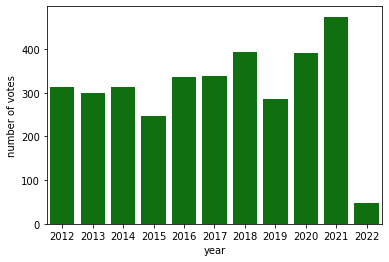

In [2]:
import matplotlib.pyplot as plt
data = df.groupby("year").count()["description_text"].reset_index()
data["number of votes"] = data["description_text"]
sns.barplot(data=data, x="year", y="number of votes", color="green")
plt.savefig('ft-votes-hist.pdf')
print(data["number of votes"].sum())